<a href="https://colab.research.google.com/github/GrzegorzMeller/AlgorithmsForMassiveData/blob/master/MODEL_APPLICATIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/amd/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /amd/


In [0]:
!cp /amd/My\ Drive/mdl.zip /content/
!unzip mdl.zip

Archive:  mdl.zip
   creating: mdl/
  inflating: mdl/saved_model.pb      
   creating: mdl/assets/
   creating: mdl/variables/
  inflating: mdl/variables/variables.index  
  inflating: mdl/variables/variables.data-00000-of-00002  
  inflating: mdl/variables/variables.data-00001-of-00002  


In [0]:
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d andrewmvd/ocular-disease-recognition-odir5k
!unzip ocular-disease-recognition-odir5k.zip

In [0]:
from tensorflow import keras
model = keras.models.load_model('mdl')

In [0]:
import cv2 as cv

def loadAndCropCenterResizeCV2(img, newSize):
    #img = cv.imread(imgPath)
    width, height, ______ = img.shape
    if width == height:
        return cv.resize(img, newSize)
    length = min(width, height)
    left = (width - length) // 2
    top = (height - length) // 2
    right = (width + length) // 2
    bottom = (height + length) // 2
    return cv.resize(img[left:right, top:bottom, :], newSize)

def clahe_resize(impath):
  img = cv.imread(impath)
  eq_image = loadAndCropCenterResizeCV2(img, (250, 250))
  
  cv.imwrite(impath,eq_image)

In [0]:
import glob

for element in glob.glob("ODIR-5K/Testing Images/*.jpg"):
  clahe_resize(element)

In [0]:
import tensorflow as tf
test_ds = tf.data.Dataset.list_files("ODIR-5K/Testing Images/*.jpg", shuffle=False)

In [0]:
for f in test_ds:
  print(f.numpy())

b'ODIR-5K/Testing Images/1000_left.jpg'
b'ODIR-5K/Testing Images/1000_right.jpg'
b'ODIR-5K/Testing Images/1001_left.jpg'
b'ODIR-5K/Testing Images/1001_right.jpg'
b'ODIR-5K/Testing Images/1002_left.jpg'
b'ODIR-5K/Testing Images/1002_right.jpg'
b'ODIR-5K/Testing Images/1003_left.jpg'
b'ODIR-5K/Testing Images/1003_right.jpg'
b'ODIR-5K/Testing Images/1004_left.jpg'
b'ODIR-5K/Testing Images/1004_right.jpg'
b'ODIR-5K/Testing Images/1007_left.jpg'
b'ODIR-5K/Testing Images/1007_right.jpg'
b'ODIR-5K/Testing Images/1009_left.jpg'
b'ODIR-5K/Testing Images/1009_right.jpg'
b'ODIR-5K/Testing Images/1026_left.jpg'
b'ODIR-5K/Testing Images/1026_right.jpg'
b'ODIR-5K/Testing Images/1027_left.jpg'
b'ODIR-5K/Testing Images/1027_right.jpg'
b'ODIR-5K/Testing Images/1029_left.jpg'
b'ODIR-5K/Testing Images/1029_right.jpg'
b'ODIR-5K/Testing Images/1030_left.jpg'
b'ODIR-5K/Testing Images/1030_right.jpg'
b'ODIR-5K/Testing Images/1037_left.jpg'
b'ODIR-5K/Testing Images/1037_right.jpg'
b'ODIR-5K/Testing Images/104

In [0]:
import matplotlib.pyplot as plt

def decode_img(img):
  img = tf.io.read_file(img)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  return img

AUTOTUNE = tf.data.experimental.AUTOTUNE
test_ds2 = test_ds.map(decode_img, num_parallel_calls=AUTOTUNE)



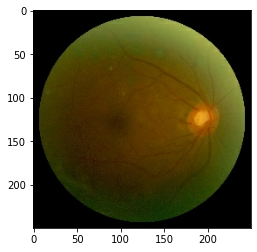

In [0]:
for image in test_ds2.take(2):
  plt.imshow(image.numpy())

In [0]:
test_ds3 = test_ds2.batch(32)
print(test_ds3)

<BatchDataset shapes: (None, None, None, 3), types: tf.float32>


In [0]:
predictions = model.predict(test_ds3)

In [0]:
import numpy
numpy.set_printoptions(precision=3,  suppress=True)
print(predictions[0])
print(predictions[1])

[0.699 0.266 0.045 0.    0.    0.    0.    0.023]
[0.392 0.317 0.074 0.    0.055 0.    0.    0.136]


In [0]:
def merge_two(left, right):
  final_table = [0, 0, 0, 0, 0, 0, 0, 0]
  counter = 0
  not_n = 0
  for l in left:
    r = right[counter]
    if l>=r:
      final_table[counter] = l
    else:
      final_table[counter] = r
    if (l>0.5 or r >0.5) and counter>0:
      print(l ,r, counter)
      not_n=1
    counter+=1
  if not_n == 1:
    final_table[0] = 0
  return final_table

In [0]:
f_t = merge_two(predictions[0], predictions[1])

In [0]:
numpy.set_printoptions(precision=3,  suppress=True)
print(f_t)

[0.6987603, 0.31726986, 0.07395622, 6.6431894e-05, 0.055490106, 3.766614e-06, 0.000102992955, 0.13593659]


In [0]:
init = 1000
counter = 0
for element in predictions:
  if counter %2 ==0:
    print(init, merge_two(predictions[counter], predictions[counter+1]))
    init+=1
  counter+=1

1000 [0.6987603, 0.31726986, 0.07395622, 6.6431894e-05, 0.055490106, 3.766614e-06, 0.000102992955, 0.13593659]
1001 [0.011784613, 0.36368972, 0.0052633286, 1.27062995e-05, 0.017072499, 7.94632e-06, 4.309724e-09, 0.05160889]
0.36401448 0.7766404 1
1002 [0, 0.7766404, 0.022620887, 1.4770457e-10, 0.00034478307, 0.17838335, 1.2645927e-07, 0.05326411]
0.99378574 0.0015007257 1
0.00019678473 0.99958766 5
1003 [0, 0.99378574, 2.8457366e-08, 1.2342959e-19, 0.000116351905, 0.99958766, 0.0003465712, 0.07405329]
0.71951103 0.6496848 1
0.13893008 0.70466423 7
1004 [0, 0.71951103, 0.05294305, 5.3437466e-06, 0.0012654662, 0.058811605, 3.378819e-10, 0.70466423]
1005 [0.1698646, 0.41253912, 0.00448215, 1.818211e-07, 0.0074166656, 0.09485531, 3.2161594e-08, 0.16993338]
1006 [0.6244951, 0.42934418, 0.0024152696, 4.0587147e-06, 0.0014807284, 0.003713429, 9.160968e-07, 0.10608894]
1007 [0.84596455, 0.48625287, 0.00023010373, 6.9710113e-09, 0.013023645, 3.712521e-06, 9.304593e-09, 0.13522485]
0.4938998 0.8

In [0]:
counter

1000